In [90]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#Final Exam: 02 : Random Forest
#Description: Implementation of random forest

In [91]:
#import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [92]:
# Load dataset
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/End Term/'
file='hepatitis_A.csv'
df = pd.read_csv(folder+file)

In [93]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1,Q1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1,Q3
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1,Q4
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,1,Q1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,1,Q2


In [94]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,2.000000


In [95]:
#check null values
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
 VARICES            5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
HISTOLOGY           0
Age_Quartile        0
dtype: int64

In [96]:
#remove null values
df.dropna(inplace=True)

In [97]:
#check null values again
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64

In [98]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1,Q1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1,Q3
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1,Q4
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,1,Q2
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,1,Q2


In [99]:
X = df[['SEX', 'Age_Quartile', 'STEROID', 'FATIGUE', 'MALAISE']] #features variables
y = df['Class'] #target variable

In [100]:
#Label encoding age quartile
le = LabelEncoder()
X["Age_Quartile"] = le.fit_transform(X["Age_Quartile"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_70912\2828408282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age_Quartile"] = le.fit_transform(X["Age_Quartile"])


In [101]:
X.head()

,SEX,Age_Quartile,STEROID,FATIGUE,MALAISE
0,2,0,1.0,2.0,2.0
1,1,2,1.0,1.0,2.0
2,1,3,2.0,1.0,2.0
5,1,1,2.0,2.0,2.0
10,1,1,1.0,2.0,2.0


In [102]:
#train/test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [103]:
#random forest classifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
#predict on test data
y_pred = rf_model.predict(X_test)

In [105]:
#Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7941176470588235

Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.87      0.90      0.88        29

    accuracy                           0.79        34
   macro avg       0.56      0.55      0.55        34
weighted avg       0.78      0.79      0.78        34

Confusion Matrix:
 [[ 1  4]
 [ 3 26]]


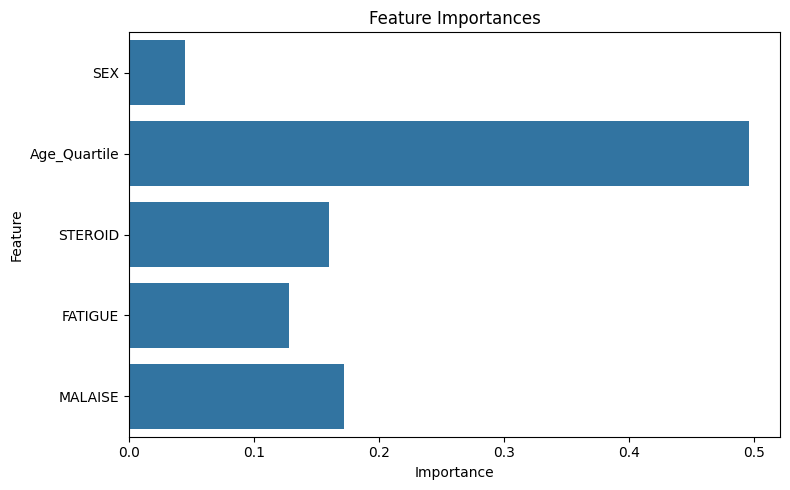

In [106]:
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Conclusion

The Random Forest model achieved an overall accuracy of 0.79 on the test set, which suggests reasonable performance. However, the classification report and confusion matrix reveal important details:

- **Class 2** (majority class) is predicted well, with high precision (0.87), recall (0.90), and f1-score (0.88).
- **Class 1** (minority class) has poor performance, with low precision (0.25), recall (0.20), and f1-score (0.22).
- The model tends to predict the majority class much more accurately, indicating a class imbalance issue.
- The macro average f1-score is **0.55**, reflecting the poor performance on the minority class.

**Conclusion:**  
While the model performs well for the majority class, it does not generalize well to the minority class. This imbalance means the model may not be suitable if predicting the minority class is important. 